In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\elecproduction.csv", parse_dates=['DATE'], index_col='DATE')
df.columns = ['Production']
df = df.asfreq('MS')
df.head()

,Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [3]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [4]:
sarima_model = auto_arima(train, seasonal=True, m=12, stepwise=True,
                         suppress_warnings=True, trace=True,
                         error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1363.427, Time=3.89 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1561.800, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1413.742, Time=0.46 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1389.557, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1630.770, Time=0.08 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1361.460, Time=3.25 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1460.445, Time=0.52 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1363.402, Time=8.62 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1410.789, Time=1.15 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=8.61 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1360.401, Time=1.83 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1460.030, Time=0.38 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=1362.315, Time=3.09 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=1362.274, Time=5.26 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [5]:
model = SARIMAX(train,
               order=sarima_model.order,
               seasonal_order=sarima_model.seasonal_order)
fitted_model = model.fit(disp=False)

In [15]:
forecast = fitted_model.forecast(steps=len(test))

In [16]:
future_date = pd.date_range(start=df.index[-1], periods = 60 + 1, freq="MS")[1:]

In [17]:
future =fitted_model.forecast(steps = 60)

In [19]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"Best SARIMA Order: {sarima_model.order}")
print(f"Seasonal Order: {sarima_model.seasonal_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Best SARIMA Order: (1, 0, 2)
Seasonal Order: (0, 1, 1, 12)
MAE: 3.01
RMSE: 3.81


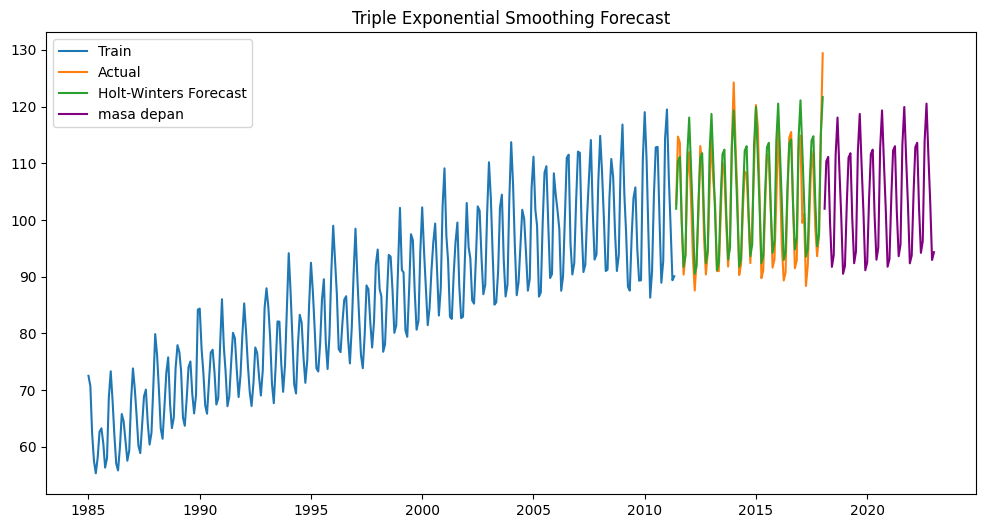

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Production'], label='Train')
plt.plot(test.index, test['Production'], label='Actual')
plt.plot(test.index, forecast, label='Holt-Winters Forecast')
plt.plot(future_date, future, label='masa depan', color='purple')

plt.title('Triple Exponential Smoothing Forecast')
plt.legend()
plt.show()

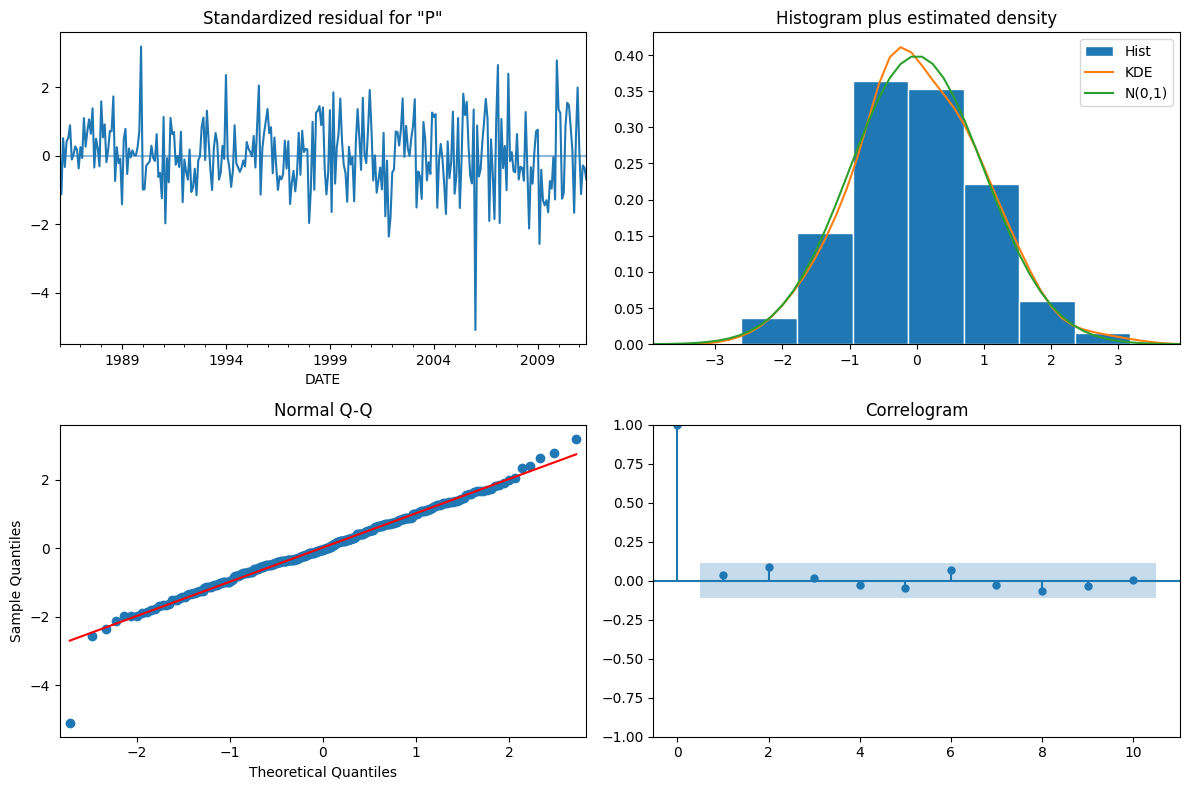

In [21]:
fitted_model.plot_diagnostics(figsize=(12,8))
plt.tight_layout()
plt.show()